In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

load TnSeq / expression data:

In [7]:
file_data = '../data/integrated_rnaseq_tnseq_v1.csv'
df_data = pd.read_csv(file_data)
cols = df_data.columns.tolist()

In [11]:
# how many columns
len(cols)

1173

In [13]:
df_data.head(1)

,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,Function,groups,redox_enzyme,function_redox_,UK_score_4,function_sanger,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,dnaA,1.0,0.0,Chromosomal replication initiator protein DnaA,0.0,0.0,NaN,0.0,chromosomal replication initiator protein,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Getting all data for a single gene: 

In [75]:
cols_data = np.array(df_data.columns[11:].tolist())

In [78]:
cols_rna_ii = [i for i in range(len(cols_data)) if not 'vs' in cols_data[i]]

In [79]:
cols_data[cols_rna_ii]

array(['1', '2', '3', ..., '1187', '1188', '1189'], dtype='<U55')

In [59]:
def get_gene_data(rv, df_data, cols_data):
    df_rv = df_data[df_data.Rv_ID==rv]
    rv_data = df_rv[cols_data].values[0]
    return rv_data

In [63]:
rv_1 = 'Rv1407'
rv_1_data = get_gene_data(rv_1, df_data, cols_data)

rv_2 = 'Rv3322c'
rv_2_data = get_gene_data(rv_2, df_data, cols_data)


PROBLEM: The TnSeq data is binarized; the RNA-Seq data is not binarized

* How do I binarize the RNA Seq data only?
* Related question: We should probably be working with both datasets in the same format [fix this later! keep moving for now]

In [64]:
rv_1_data.shape

(1162,)

In [40]:
col = '100'
data_test = df_data[~df_data[col].isna()][col].values

(array([2.000e+00, 5.000e+00, 1.700e+01, 7.000e+01, 7.500e+02, 3.086e+03,
        8.500e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.4547   , -2.7987268, -2.1427536, -1.4867804, -0.8308072,
        -0.174834 ,  0.4811392,  1.1371124,  1.7930856,  2.4490588,
         3.105032 ]),
 <a list of 10 Patch objects>)

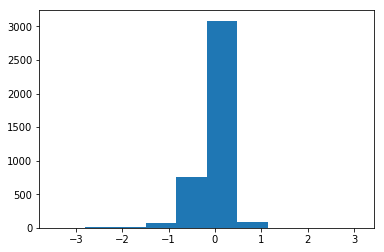

In [43]:
plt.hist(data_test)